In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("loan_approval_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

# Handle missing Values

In [7]:
categorical_cols = df.select_dtypes(include = ["object"]).columns
numerical_cols = df.select_dtypes(include = ["number"]).columns

In [8]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy = "mean")   #for numerical values
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])


cate_imp = SimpleImputer(strategy = "most_frequent") #for categorical Values
df[categorical_cols] = cate_imp.fit_transform(df[categorical_cols])

# EDA - Exploratory data analysis

Text(0.5, 1.0, 'Is loan approved ?')

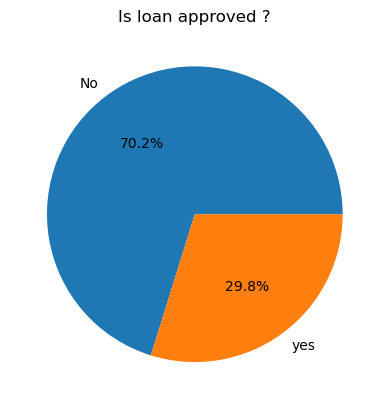

In [9]:
#how balanced our classes are??

classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count, labels = ["No","yes"],autopct = "%1.1f%%")
plt.title("Is loan approved ?")

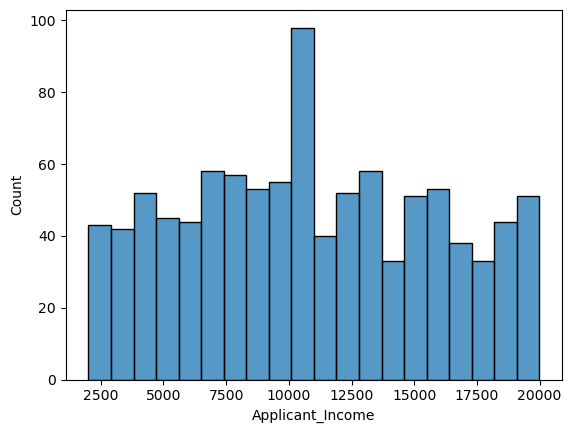

In [10]:
#analyze categories
# gender_count = df["Gender"].value_counts()
# ax = sns.barplot(gender_count)
# ax.bar_label(ax.containers[0])

# m_count = df["Applicant_Income"].value_counts()
ax = sns.histplot(
    data=df,
    x = "Applicant_Income",
    bins = 20
)
# ax.bar_label(ax.containers[0])

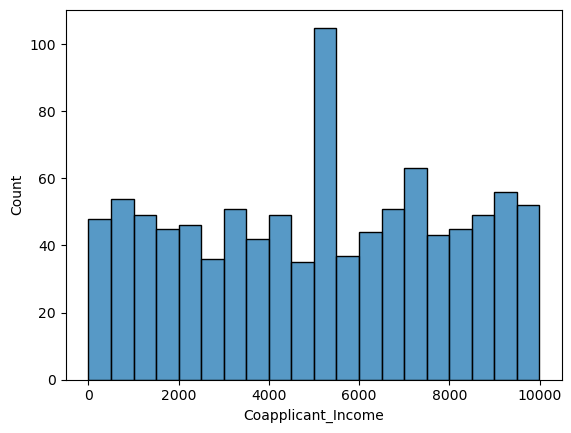

In [11]:
ax = sns.histplot(
    data=df,
    x = "Coapplicant_Income",
    bins = 20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

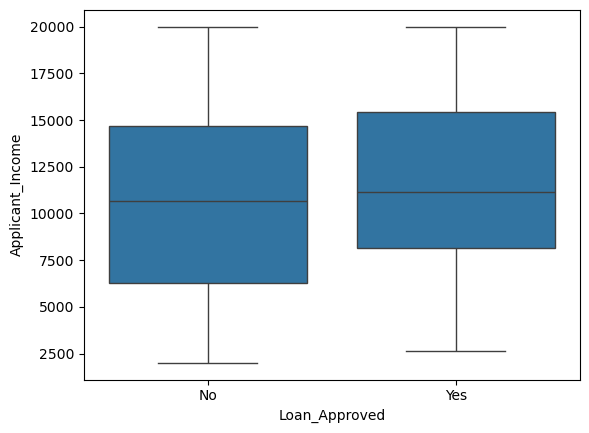

In [12]:
#outlier - boxplot\
sns.boxplot(
    data = df,
    y = "Applicant_Income",
    x = "Loan_Approved"
)

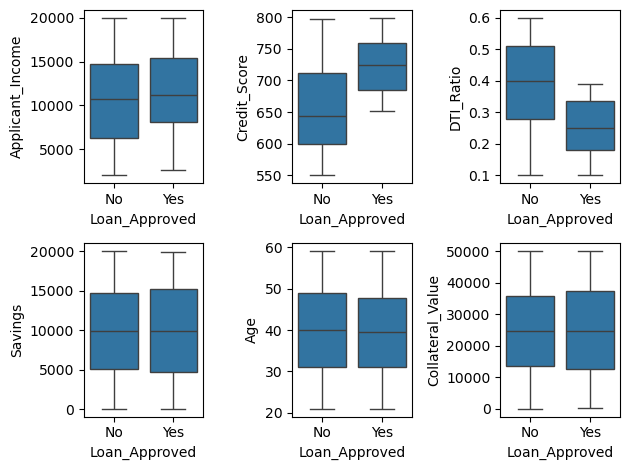

In [13]:
fig, axes = plt.subplots(2,3)

sns.boxplot(ax = axes[0, 0], data = df, x = "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax = axes[0, 1], data = df, x = "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax = axes[0, 2], data = df, x = "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax = axes[1, 0], data = df, x = "Loan_Approved", y = "Savings")
sns.boxplot(ax = axes[1, 1], data = df, x = "Loan_Approved", y = "Age")
sns.boxplot(ax = axes[1, 2], data = df, x = "Loan_Approved", y = "Collateral_Value")

fig.tight_layout()

<Axes: xlabel='DTI_Ratio', ylabel='Count'>

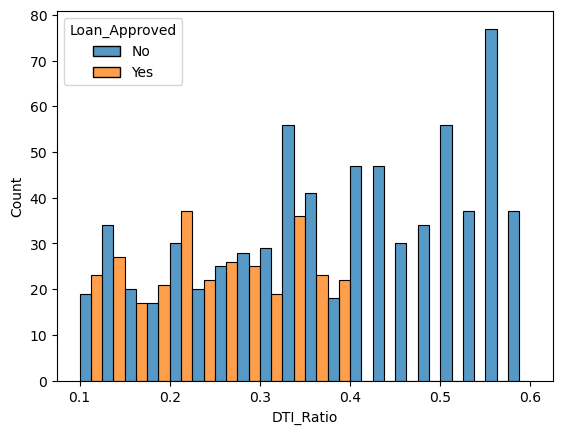

In [14]:
#credit Score with Loan approved
sns.histplot(
    data = df,
    x = "DTI_Ratio",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge"
)

In [15]:
#Remove Applicant Id
df = df.drop("Applicant_ID",axis = 1)

In [16]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# Encoding

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [18]:
#Label encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])


In [19]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [20]:
#One Hot Encoder

cols = ["Marital_Status","Employment_Status","Loan_Purpose","Gender","Employer_Category","Property_Area"]

ohe = OneHotEncoder(drop = "first", sparse_output = False,handle_unknown = "ignore")

encoded = ohe.fit_transform(df[cols])
Encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(cols), index = df.index)

df = pd.concat([df.drop(columns = cols), Encoded_df], axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

In [22]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
num_cols = df.select_dtypes(include = "number")
corr_matrix = num_cols.corr()

In [24]:
num_cols.corr()["Loan_Approved"].sort_values(ascending = False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

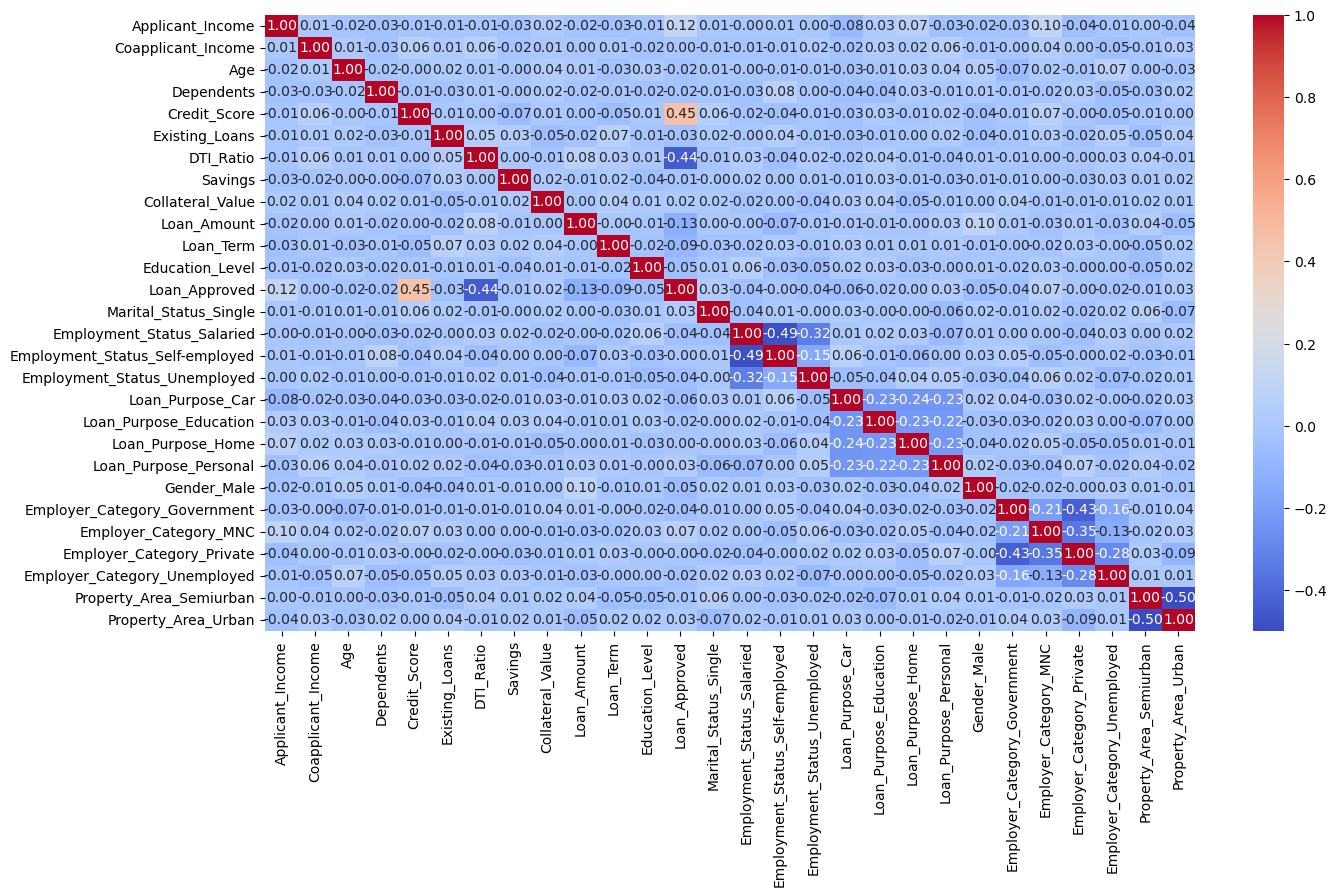

In [25]:
plt.figure(figsize = (15,8))
sns.heatmap(
    data = corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
)


# Train-test-Split + feature Scaling

In [26]:
X = df.drop("Loan_Approved", axis = 1)
y = df["Loan_Approved"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [30]:
X_train_scaled 

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -3.07231582e-01, -4.80384461e-01, -1.05395348e+00],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -3.07231582e-01, -4.80384461e-01,  9.48808479e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -3.07231582e-01,  2.08166600e+00, -1.05395348e+00],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -3.07231582e-01, -4.80384461e-01, -1.05395348e+00],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -3.07231582e-01, -4.80384461e-01, -1.05395348e+00],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
        -3.07231582e-01, -4.80384461e-01,  9.48808479e-01]],
      shape=(800, 27))

# Train & Evalute model

In [31]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
y_pred = log_model.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print("Logistic regression")
print("accuracy_score",accuracy_score(y_pred,y_test)*100,"%")
print("precision_score",precision_score(y_pred,y_test)*100,"%")
print("recall_score",recall_score(y_pred,y_test)*100,"%")
print("f1_score",f1_score(y_pred,y_test)*100,"%")

Logistic regression
accuracy_score 86.5 %
precision_score 77.04918032786885 %
recall_score 78.33333333333333 %
f1_score 77.68595041322314 %


In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
y_pred = knn_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print("for KNN")
print("accuracy_score",accuracy_score(y_pred,y_test)*100,"%")
print("precision_score",precision_score(y_pred,y_test)*100,"%")
print("recall_score",recall_score(y_pred,y_test)*100,"%")
print("f1_score",f1_score(y_pred,y_test)*100,"%")

for KNN
accuracy_score 76.0 %
precision_score 52.459016393442624 %
recall_score 62.745098039215684 %
f1_score 57.14285714285714 %


In [36]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train_scaled, y_train)


,priors,None
,var_smoothing,1e-09


In [37]:
y_pred = naive_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print("for naive_bayes model")
print("accuracy_score",accuracy_score(y_pred,y_test)*100,"%")
print("precision_score",precision_score(y_pred,y_test)*100,"%")
print("recall_score",recall_score(y_pred,y_test)*100,"%")
print("f1_score",f1_score(y_pred,y_test)*100,"%")

for naive_bayes model
accuracy_score 86.5 %
precision_score 73.77049180327869 %
recall_score 80.35714285714286 %
f1_score 76.92307692307693 %


# BEST MODEL => NAIVE BAYES

In [38]:
#FEATURE ENGINEERING
df["DTI_RATIO_Sqr"] = df["DTI_Ratio"] ** 2
df["Credit_Score_Sq"] = df["Credit_Score"] ** 2
# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns = ["Loan_Approved","Credit_Score","DTI_Ratio"])
y = df["Loan_Approved"]

#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Loan_Purpose_Personal,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Property_Area_Semiurban,Property_Area_Urban,DTI_RATIO_Sqr,Credit_Score_Sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0324,457021.542187


In [40]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix

print("Logistic regression")
print("accuracy_score",accuracy_score(y_pred,y_test)*100,"%")
print("precision_score",precision_score(y_pred,y_test)*100,"%")
print("recall_score",recall_score(y_pred,y_test)*100,"%")
print("f1_score",f1_score(y_pred,y_test)*100,"%")
print("CM:",confusion_matrix(y_test,y_pred))

Logistic regression
accuracy_score 87.5 %
precision_score 80.32786885245902 %
recall_score 79.03225806451613 %
f1_score 79.67479674796748 %
CM: [[126  13]
 [ 12  49]]


In [41]:
#naive bayes
#Naive bayes
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train_scaled, y_train)

y_pred = naive_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print("for naive_bayes model")
print("accuracy_score",accuracy_score(y_pred,y_test)*100,"%")
print("precision_score",precision_score(y_pred,y_test)*100,"%")
print("recall_score",recall_score(y_pred,y_test)*100,"%")
print("f1_score",f1_score(y_pred,y_test)*100,"%")                

for naive_bayes model
accuracy_score 86.5 %
precision_score 77.04918032786885 %
recall_score 78.33333333333333 %
f1_score 77.68595041322314 %
